In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
df=pd.read_csv('toko-2020.csv')
df.head()

,Unnamed: 0,name,country,sport,g_medal,s_medal,b_medal
0,0,julia beljajeva,EST,Fencing,1,0,0
1,1,david belyavskiy,ROC,Artistic Gymnastics,1,0,0
2,2,jayson tatum,USA,Basketball,1,0,0
3,3,brianna throssell,AUS,Swimming,1,0,0
4,4,risi pouri-lane,NZL,Rugby Sevens,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2401 non-null   int64 
 1   name        2401 non-null   object
 2   country     2397 non-null   object
 3   sport       2397 non-null   object
 4   g_medal     2401 non-null   int64 
 5   s_medal     2401 non-null   int64 
 6   b_medal     2401 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 131.4+ KB


**checking for missing values**

In [ ]:
print(df.isnull().sum())

Unnamed: 0    0
name          0
country       4
sport         4
g_medal       0
s_medal       0
b_medal       0
dtype: int64


In [ ]:
df['country'].fillna('Unknown', inplace=True)
df['sport'].fillna('Unknown', inplace=True)

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
print(df[['g_medal', 's_medal', 'b_medal']].describe())

# Ensure no negative values
print((df[['g_medal', 's_medal', 'b_medal']] < 0).sum())


           g_medal      s_medal      b_medal
count  2401.000000  2401.000000  2401.000000
mean      0.324865     0.319450     0.355685
std       0.468422     0.466361     0.478820
min       0.000000     0.000000     0.000000
25%       0.000000     0.000000     0.000000
50%       0.000000     0.000000     0.000000
75%       1.000000     1.000000     1.000000
max       1.000000     1.000000     1.000000
g_medal    0
s_medal    0
b_medal    0
dtype: int64


**manually checking for unusual values**

In [ ]:
print(df['country'].unique())
print(df['sport'].unique())

['EST' 'ROC' 'USA' 'AUS' 'NZL' 'UZB' 'UGA' 'CHN' 'FRA' 'CAN' 'MAR' 'JPN'
 'BRA' 'FIJ' 'KOR' 'DEN' 'GER' 'ROU' 'ITA' 'NED' 'SLO' 'UKR' 'KEN' 'HUN'
 'RSA' 'CUB' 'POL' 'BEL' 'SRB' 'SWE' 'ISR' 'TPE' 'JAM' 'CRO' 'GBR' 'IRL'
 'NOR' 'SVK' 'CZE' 'TUN' 'GRE' 'BUL' 'PHI' 'ESP' 'SUI' 'INA' 'GEO' 'IND'
 'TUR' 'ECU' 'POR' 'BAH' 'KOS' 'QAT' 'IRI' 'LAT' 'BLR' 'AUT' 'THA' 'VEN'
 'PUR' 'Unknown' 'ETH' 'HKG' 'BER' 'EGY' 'LTU' 'NGR' 'COL' 'SMR' 'KGZ'
 'ARG' 'AZE' 'MKD' 'TKM' 'JOR' 'MGL' 'DOM' 'MAS' 'NAM' 'ARM' 'BRN' 'KSA'
 'MEX' 'BOT' 'KAZ' 'FIN' 'GHA' 'SYR' 'KUW' 'MDA' 'BUR' 'GRN' 'CIV']
['Fencing' 'Artistic Gymnastics' 'Basketball' 'Swimming' 'Rugby Sevens'
 'Boxing' 'Athletics' 'Weightlifting' 'Volleyball' 'Rowing' 'Wrestling'
 'Water Polo' 'Football' 'Handball' 'Surfing' 'Baseball/Softball'
 'Sailing' 'Shooting' 'Cycling Track' 'Canoe Sprint' 'Equestrian' 'Judo'
 'Hockey' 'Canoe Slalom' 'Taekwondo' 'Diving' 'Artistic Swimming' 'Tennis'
 'Rhythmic Gymnastics' '3x3 Basketball' 'Cycling Mountain Bike' '

# feature engineering


In [ ]:
#adding new features to help ease the analysis process
df['total_medals'] = df['g_medal'] + df['s_medal'] + df['b_medal']
#using the LOF weighted point system to calculate medal score
df['medal_score'] = (df['g_medal'] * 5) + (df['s_medal'] * 3) + (df['b_medal'] * 2)


 **will be ceating a datframe that mainly focus on the countries**


In [ ]:

# Aggregate total medals by sport and country
medals_by_sport_country = df.groupby(['country', 'sport']).agg(
    total_medals=('total_medals', 'sum')
).reset_index()

# Determine the best sport for each country
idx = medals_by_sport_country.groupby('country')['total_medals'].idxmax()
best_sport_per_country = medals_by_sport_country.loc[idx].reset_index(drop=True)
best_sport_per_country = best_sport_per_country.rename(columns={'sport': 'best_sport'})

# Aggregate number of athletes per country
num_athletes_per_country = df.groupby('country').agg(
    num_athletes=('name', 'nunique')  # Count unique athletes
).reset_index()

# Aggregate country summary
country_summary = df.groupby('country').agg(
    number_of_sports=('sport', 'nunique'),  # Number of unique sports
    total_medals=('total_medals', 'sum'),
    total_medal_score=('medal_score', 'sum')
).reset_index()

# Merge with the best_sport_per_country DataFrame
country_summary = country_summary.merge(best_sport_per_country[['country', 'best_sport']], on='country', how='left')

# Merge with the number of athletes per country
country_summary = country_summary.merge(num_athletes_per_country, on='country', how='left')

# Sort by total medals in descending order
country_summary = country_summary.sort_values(by='total_medals', ascending=False)

print("Country Summary DataFrame:")
display(country_summary)

print("\nCountry Summary DataFrame Info:")
print(country_summary.info())


Country Summary DataFrame:


,country,number_of_sports,total_medals,total_medal_score,best_sport,num_athletes
90,USA,27,291,1024,Swimming,254
73,ROC,20,147,494,Fencing,128
15,CHN,20,144,511,Diving,118
30,FRA,16,136,505,Handball,129
47,JPN,19,131,507,Baseball/Softball,114
...,...,...,...,...,...,...
56,LTU,1,1,3,Modern Pentathlon,1
71,PUR,1,1,5,Athletics,1
57,MAR,1,1,5,Athletics,1
59,MDA,1,1,2,Canoe Sprint,1



Country Summary DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 90 to 16
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            94 non-null     object
 1   number_of_sports   94 non-null     int64 
 2   total_medals       94 non-null     int64 
 3   total_medal_score  94 non-null     int64 
 4   best_sport         94 non-null     object
 5   num_athletes       94 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 5.1+ KB
None


In [ ]:
# Melt the DataFrame to long format for medals
df_melted = df.melt(id_vars=['sport', 'country'], value_vars=['g_medal', 's_medal', 'b_medal'],
                    var_name='medal_type', value_name='medals')

# Aggregate by sport
sport_summary = df_melted.groupby('sport').agg(
    total_medals_per_sport=('medals', 'sum')  # Summing the total number of medals per sport
).reset_index()

# Find the country with the most medals in each sport
# First, aggregate total medals per sport and country
df_total_medals = df.groupby(['sport', 'country']).agg(
    total_medals=('total_medals', 'sum')
).reset_index()

# Find the country with the maximum medals for each sport
idx = df_total_medals.groupby('sport')['total_medals'].idxmax()
max_medals = df_total_medals.loc[idx].reset_index(drop=True)

# Merge sport_summary with country_max_medals to get the complete DataFrame
sport_summary = sport_summary.merge(max_medals[['sport']], on='sport', how='left')

# Calculate total gold medals by sport and country
total_gold_medals = df.groupby(['sport', 'country']).agg(
    total_g_medals=('g_medal', 'sum')
).reset_index()

# Find the country with the most gold medals for each sport
idx = total_gold_medals.groupby('sport')['total_g_medals'].idxmax()
country_max_gold_medals = total_gold_medals.loc[idx].reset_index(drop=True)
country_max_gold_medals = country_max_gold_medals.rename(columns={'country': 'country_with_most_gold_medals'})

# Merge sport_summary with country_max_gold_medals to get the complete DataFrame
sport_summary = sport_summary.merge(country_max_gold_medals[['sport', 'country_with_most_gold_medals']], on='sport', how='left')


print("\nSport Summary DataFrame:")
display(sport_summary)

sport_summary.info()



Sport Summary DataFrame:


,sport,total_medals_per_sport,country_with_most_gold_medals
0,3x3 Basketball,24,LAT
1,Archery,30,KOR
2,Artistic Gymnastics,61,ROC
3,Artistic Swimming,30,ROC
4,Athletics,211,USA
5,Badminton,24,CHN
6,Baseball/Softball,117,JPN
7,Basketball,72,USA
8,Beach Volleyball,12,NOR
9,Boxing,51,CUB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   sport                          47 non-null     object
 1   total_medals_per_sport         47 non-null     int64 
 2   country_with_most_gold_medals  47 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.2+ KB


# Data analysis

<ipython-input-11-df95f74c4c53>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='num_athletes', data=country_summary, palette='viridis')


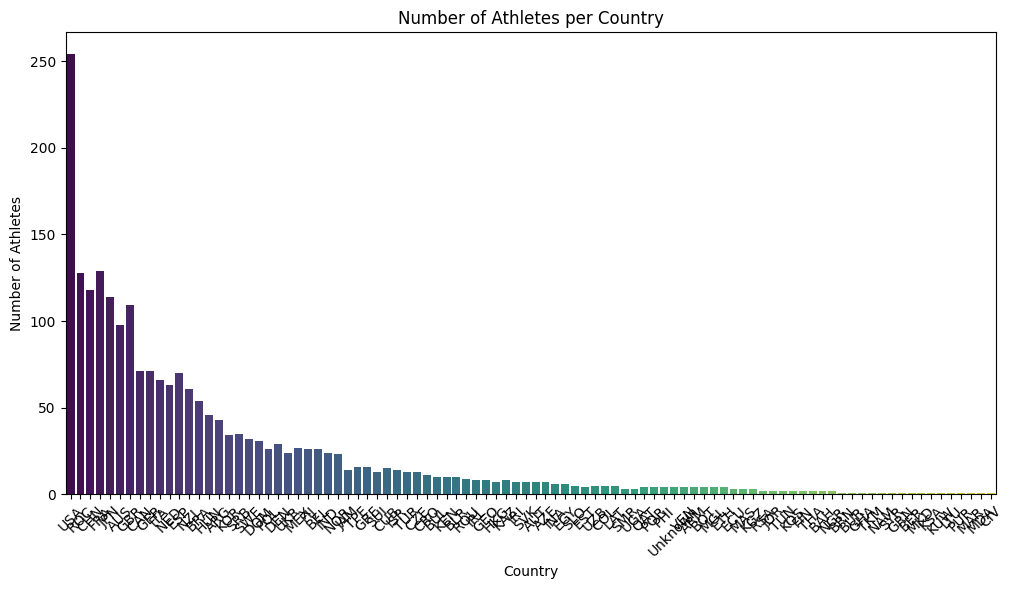

Country with the Highest Number of Athletes:
country                   USA
number_of_sports           27
total_medals              291
total_medal_score        1024
best_sport           Swimming
num_athletes              254
Name: 90, dtype: object

Country with the Lowest Number of Athletes:
country                    BRN
number_of_sports             1
total_medals                 1
total_medal_score            3
best_sport           Athletics
num_athletes                 1
Name: 11, dtype: object


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='num_athletes', data=country_summary, palette='viridis')
plt.title('Number of Athletes per Country')
plt.xlabel('Country')
plt.ylabel('Number of Athletes')
plt.xticks(rotation=45)
plt.show()
highest_country = country_summary.loc[country_summary['num_athletes'].idxmax()]
lowest_country = country_summary.loc[country_summary['num_athletes'].idxmin()]
print("Country with the Highest Number of Athletes:")
print(highest_country)
print("\nCountry with the Lowest Number of Athletes:")
print(lowest_country)

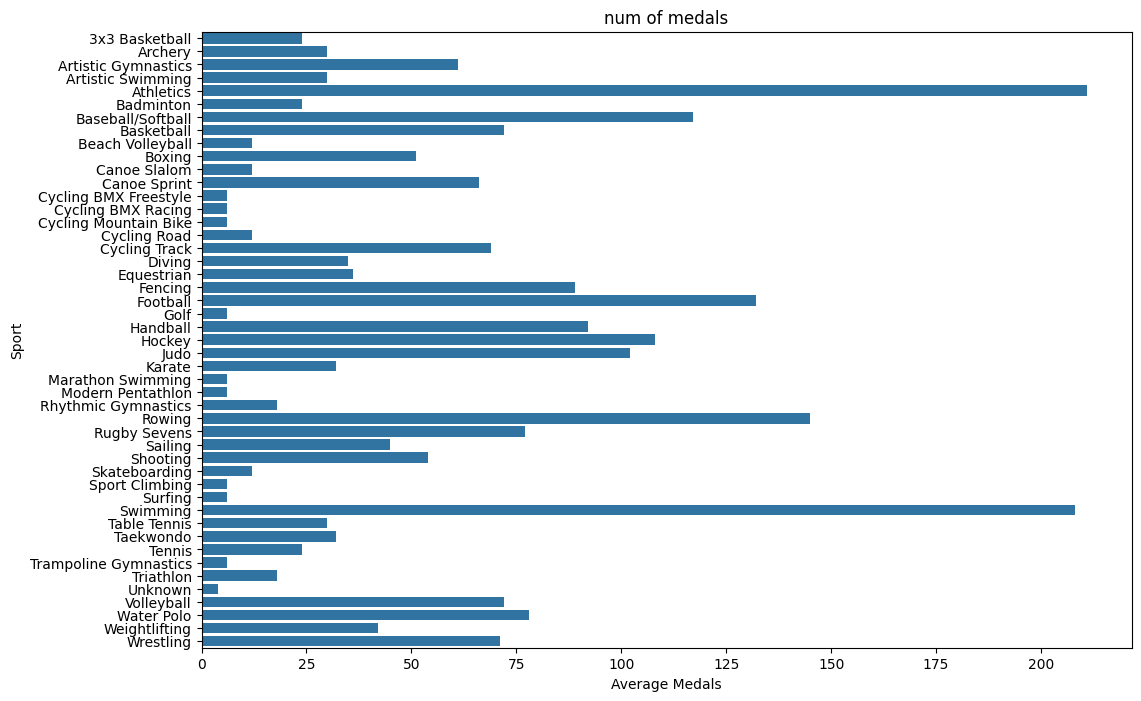

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='total_medals_per_sport', y='sport', data=sport_summary)
plt.title('num of medals')
plt.xlabel('Average Medals')
plt.ylabel('Sport')
plt.show()

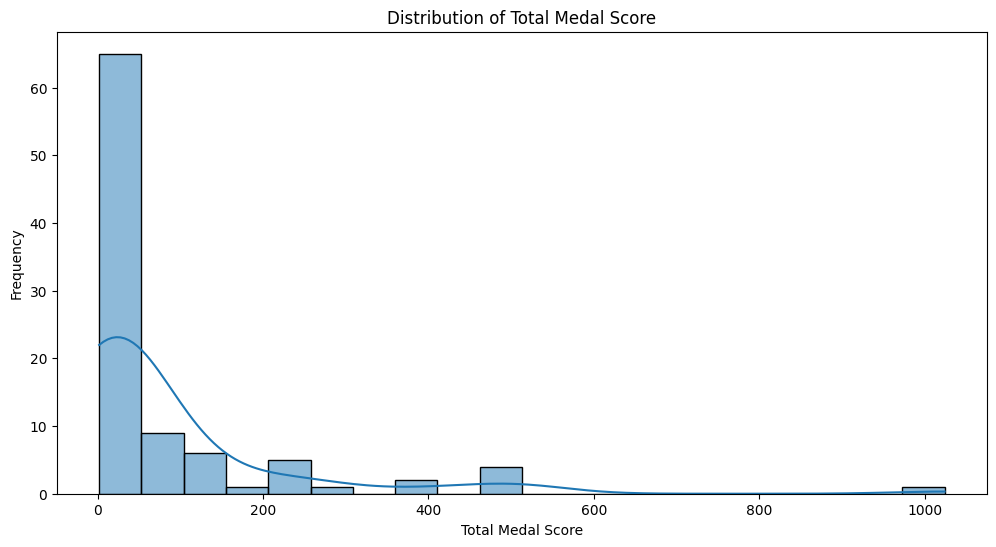

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(country_summary['total_medal_score'], bins=20, kde=True)
plt.title('Distribution of Total Medal Score')
plt.xlabel('Total Medal Score')
plt.ylabel('Frequency')
plt.show()

<ipython-input-15-0c62e422ff08>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sport', y='total_medals_per_sport', data=sport_summary, palette='viridis')


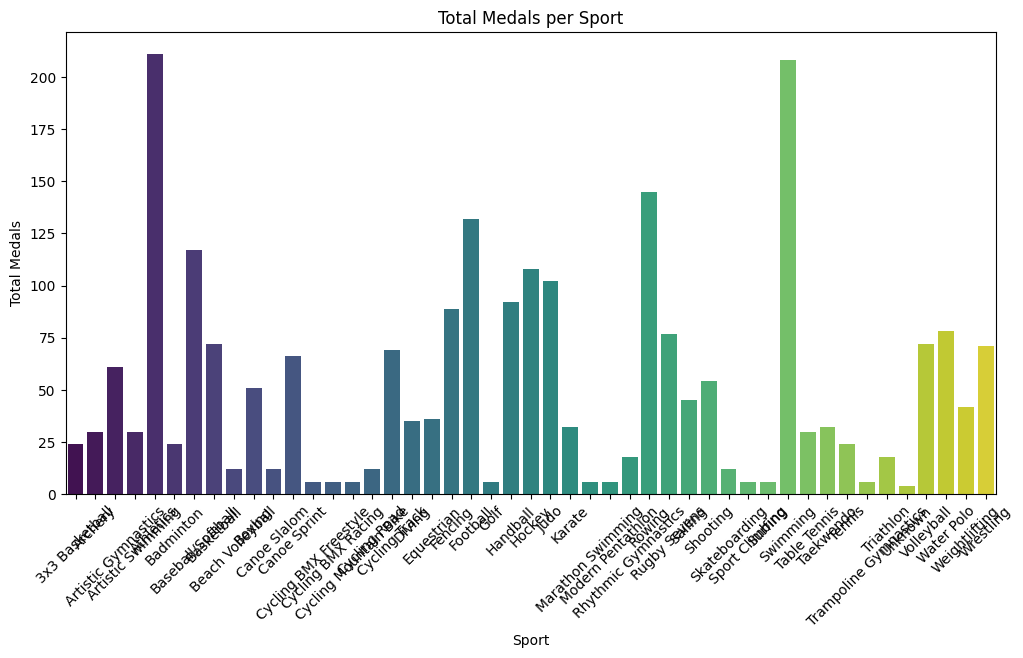

Sport with the Highest Total Medals:
sport                            Athletics
total_medals_per_sport                 211
country_with_most_gold_medals          USA
Name: 4, dtype: object

Sport with the Lowest Total Medals:
sport                            Athletics
total_medals_per_sport                 211
country_with_most_gold_medals          USA
Name: 4, dtype: object


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='sport', y='total_medals_per_sport', data=sport_summary, palette='viridis')
plt.title('Total Medals per Sport')
plt.xlabel('Sport')
plt.ylabel('Total Medals')
plt.xticks(rotation=45)
plt.show()
highest_sport = sport_summary.loc[sport_summary['total_medals_per_sport'].idxmax()]
lowest_sport = sport_summary.loc[sport_summary['total_medals_per_sport'].idxmax()]
print("Sport with the Highest Total Medals:")
print(highest_sport)
print("\nSport with the Lowest Total Medals:")
print(lowest_sport)

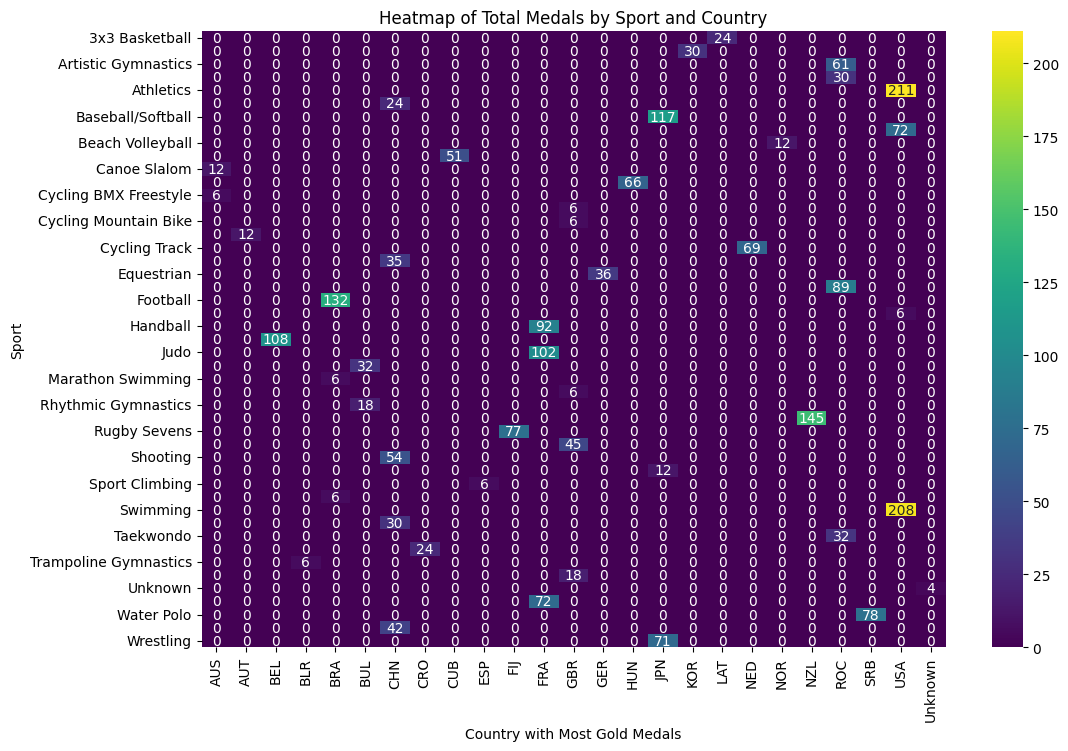

In [ ]:
pivot_table = sport_summary.pivot_table(index='sport', columns='country_with_most_gold_medals', values='total_medals_per_sport', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='d')
plt.title('Heatmap of Total Medals by Sport and Country')
plt.xlabel('Country with Most Gold Medals')
plt.ylabel('Sport')
plt.show()

In [ ]:
top_countries = country_summary.sort_values(by='total_medal_score', ascending=False).head(10)
print(top_countries[['country', 'total_medal_score', 'best_sport']])


   country  total_medal_score         best_sport
90     USA               1024           Swimming
15     CHN                511             Diving
47     JPN                507  Baseball/Softball
30     FRA                505           Handball
73     ROC                494            Fencing
31     GBR                407           Swimming
2      AUS                391           Swimming
14     CAN                287           Football
64     NED                257             Hockey
67     NZL                245       Rugby Sevens


In [ ]:
sport_summary.to_csv('sport.csv', index=False)
country_summary.to_csv('country.csv', index=False)

In [ ]:
files.download('sport.csv')
files.download('country.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>